In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
data = pd.read_csv("kidney_cleaned.csv",index_col=0)


In [12]:
X = data.drop(['classification','id'], axis=1)
y = data['classification']

In [13]:
# Label Encoding for target variable
le = LabelEncoder()
y = le.fit_transform(y)
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))
    label_encoders[feature] = le


In [14]:
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    label_encoders[feature] = le


In [15]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [17]:
#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Apply PCA
pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [19]:
model = XGBClassifier() 
model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[54  0]
 [ 0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [21]:
X_train_pca

array([[ 2.95819072e+00,  8.43946989e-01],
       [-2.73230780e+00, -1.79342718e-01],
       [-2.42368068e+00,  4.62330958e-01],
       [ 6.18365692e+00,  1.21352624e+00],
       [-2.60960999e+00,  3.43532975e-01],
       [ 1.21893418e+00,  6.34272127e-01],
       [ 4.25984901e+00, -1.64626200e+00],
       [ 4.19149100e-01,  3.11294947e+00],
       [ 1.40240787e+00,  1.22504691e+00],
       [ 1.41439324e+00,  5.34725593e-01],
       [-3.31827999e-02,  1.80890014e+00],
       [-2.94593835e+00,  3.51475019e-01],
       [-2.68512126e+00,  2.44020382e-01],
       [ 2.22662866e+00, -1.17427178e+00],
       [-2.61659867e+00,  6.24847607e-01],
       [-4.56433863e-01,  2.08299288e-02],
       [-4.31863815e-01, -2.46117268e-01],
       [ 5.76614816e+00, -2.47970789e+00],
       [-2.72362860e+00,  1.11222837e-01],
       [-2.30463002e+00, -4.49532287e-02],
       [ 8.09932478e+00,  2.18567924e+00],
       [-1.12476955e+00,  1.01536130e-01],
       [-2.37211711e+00,  6.41253008e-02],
       [ 3.

In [22]:
# Model Evaluation
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[54  0]
 [ 0 26]]


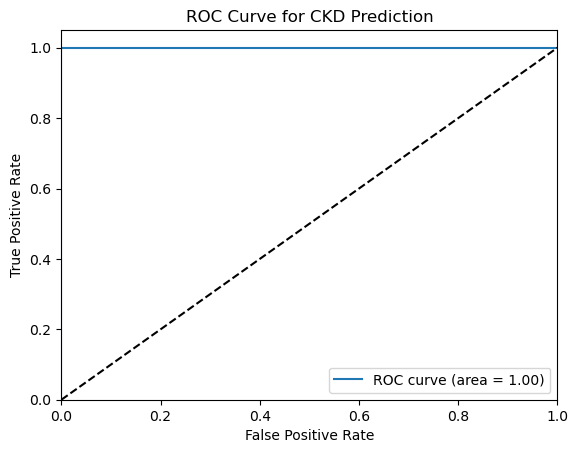

In [23]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CKD Prediction')
plt.legend(loc="lower right")
plt.show()

In [24]:
import shap
explainer =shap.Explainer(model.predict,X_test_pca)

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
shap_values = explainer(X_test_pca)


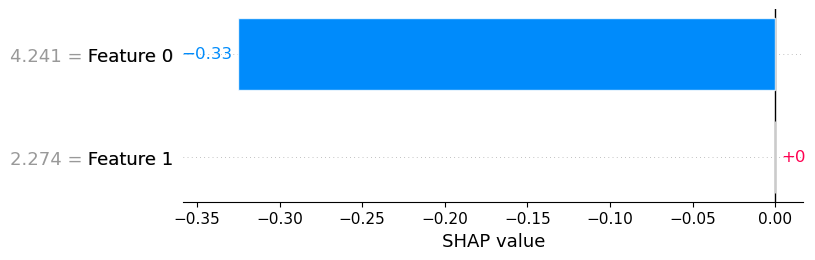

In [26]:
shap.plots.bar(shap_values[2])